Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Cloning the GitHub

In [ ]:
!git clone https://github.com/NishantPatel18/RoadCrackDetection.git

Cloning into 'RoadCrackDetection'...
remote: Enumerating objects: 872, done.
remote: Counting objects: 100% (872/872), done.
remote: Compressing objects: 100% (600/600), done.
remote: Total 121371 (delta 373), reused 767 (delta 271), pack-reused 120499
Receiving objects: 100% (121371/121371), 2.63 GiB | 41.94 MiB/s, done.
Resolving deltas: 100% (10123/10123), done.
Checking out files: 100% (180639/180639), done.


Changing the directory

In [ ]:
%cd /content/RoadCrackDetection/Image_Classification

/content/RoadCrackDetection/Image_Classification


Training and Testing

The class labels are: ['D00', 'D01', 'D10', 'D11', 'D20', 'D40', 'D43', 'D44'] 



Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth



2208
Epoch: 1
Batch: 1 out of 296
Batch: 2 out of 296
Batch: 3 out of 296
Batch: 4 out of 296
Batch: 5 out of 296
Batch: 6 out of 296
Batch: 7 out of 296
Batch: 8 out of 296
Batch: 9 out of 296
Batch: 10 out of 296
Batch: 11 out of 296
Batch: 12 out of 296
Batch: 13 out of 296
Batch: 14 out of 296
Batch: 15 out of 296
Batch: 16 out of 296
Batch: 17 out of 296
Batch: 18 out of 296
Batch: 19 out of 296
Batch: 20 out of 296
Batch: 21 out of 296
Batch: 22 out of 296
Batch: 23 out of 296
Batch: 24 out of 296
Batch: 25 out of 296
Batch: 26 out of 296
Batch: 27 out of 296
Batch: 28 out of 296
Batch: 29 out of 296
Batch: 30 out of 296
Batch: 31 out of 296
Batch: 32 out of 296
Batch: 33 out of 296
Batch: 34 out of 296
Batch: 35 out of 296
Batch: 36 out of 296
Batch: 37 out of 296
Batch: 38 out of 296
Batch: 39 out of 296
Batch: 40 out of 296
Batch: 41 out of 296
Batch: 42 out of 296
Batch: 43 out of 296
Batch: 44 out of 296
Batch: 45 out of 296
Batch: 46 out of 296
Batch: 47 out of 296
Batch: 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:190: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:191: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:192: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:20.)


Streaming output truncated to the last 5000 lines.
Batch: 61 out of 127
Batch: 62 out of 127
Batch: 63 out of 127
Batch: 64 out of 127
Batch: 65 out of 127
Batch: 66 out of 127
Batch: 67 out of 127
Batch: 68 out of 127
Batch: 69 out of 127
Batch: 70 out of 127
Batch: 71 out of 127
Batch: 72 out of 127
Batch: 73 out of 127
Batch: 74 out of 127
Batch: 75 out of 127
Batch: 76 out of 127
Batch: 77 out of 127
Batch: 78 out of 127
Batch: 79 out of 127
Batch: 80 out of 127
Batch: 81 out of 127
Batch: 82 out of 127
Batch: 83 out of 127
Batch: 84 out of 127
Batch: 85 out of 127
Batch: 86 out of 127
Batch: 87 out of 127
Batch: 88 out of 127
Batch: 89 out of 127
Batch: 90 out of 127
Batch: 91 out of 127
Batch: 92 out of 127
Batch: 93 out of 127
Batch: 94 out of 127
Batch: 95 out of 127
Batch: 96 out of 127
Batch: 97 out of 127
Batch: 98 out of 127
Batch: 99 out of 127
Batch: 100 out of 127
Batch: 101 out of 127
Batch: 102 out of 127
Batch: 103 out of 127
Batch: 104 out of 127
Batch: 105 out of 12

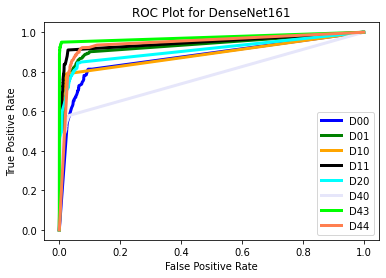

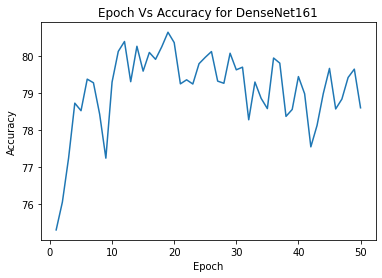

In [ ]:
# Import Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import numpy as np
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

# Specify transforms using torchvision.transforms as transforms library
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load in each dataset and apply transformations using the torchvision.datasets as datasets library
train_set = datasets.ImageFolder("RDDC_Train", transform=transformations)
val_set = datasets.ImageFolder("RDDC_Test", transform=transformations)

print('The class labels are:', train_set.classes, '\n')

# Put into a Dataloader using torch library
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)

# Get pretrained model using torchvision.models as models library
model = models.densenet161(pretrained=True)

# Turn off training for their parameters
for param in model.parameters():
    param.requires_grad = False

# Create new classifier for model using torch.nn as nn library
classifier_input = model.classifier.in_features
# classifier_input = 2208
print(classifier_input)

num_labels = 8
classifier = nn.Sequential(nn.Linear(classifier_input, 64),
                           nn.ReLU(),
                           nn.Linear(64, 32),
                           nn.ReLU(),
                           nn.Linear(32, num_labels),
                           nn.LogSoftmax(dim=1))

# Replace default classifier with new classifier
model.classifier = classifier

# Find the device available to use using torch library
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

# Move model to the device specified above
model.to(device)

# Set the error function using torch.nn as nn library
criterion = nn.NLLLoss()
# Set the optimizer function using torch.optim as optim library
optimizer = optim.Adam(model.classifier.parameters())

# Training the Model
epochs = 50
start_train = time.time()
epoch_array = []
accu_array = []
D00_TPR_array = []
D00_FPR_array = []
D01_TPR_array = []
D01_FPR_array = []
D10_TPR_array = []
D10_FPR_array = []
D11_TPR_array = []
D11_FPR_array = []
D20_TPR_array = []
D20_FPR_array = []
D40_TPR_array = []
D40_FPR_array = []
D43_TPR_array = []
D43_FPR_array = []
D44_TPR_array = []
D44_FPR_array = []
D00_TPR_array.append(0)
D00_FPR_array.append(0)
D01_TPR_array.append(0)
D01_FPR_array.append(0)
D10_TPR_array.append(0)
D10_FPR_array.append(0)
D11_TPR_array.append(0)
D11_FPR_array.append(0)
D20_TPR_array.append(0)
D20_FPR_array.append(0)
D40_TPR_array.append(0)
D40_FPR_array.append(0)
D43_TPR_array.append(0)
D43_FPR_array.append(0)
D44_TPR_array.append(0)
D44_FPR_array.append(0)

for epoch in range(epochs):
    display_epoch = epoch + 1
    print('Epoch:', display_epoch)
    epoch_array.append(display_epoch)
    train_loss = 0
    val_loss = 0
    accuracy = 0

    # Training the model
    model.train()
    counter = 0
    for inputs, labels in train_loader:
        # Move to device
        inputs, labels = inputs.to(device), labels.to(device)
        # Clear optimizers
        optimizer.zero_grad()
        # Forward pass
        output = model.forward(inputs)
        # Loss
        loss = criterion(output, labels)
        # Calculate gradients (backpropogation)
        loss.backward()
        # Adjust parameters based on gradients
        optimizer.step()
        # Add the loss to the training set's rnning loss
        train_loss += loss.item() * inputs.size(0)

        # Print the progress of our training
        counter += 1
        print("Batch:", counter, "out of", len(train_loader))

    end_train = time.time()
    print('Finished Epoch', epoch + 1, 'Training in %0.2f minutes' % ((end_train - start_train) / 60))

    # Evaluating the model
    start_valid = time.time()
    model.eval()
    counter = 0

    total_classes = 8
    output = torch.randn(batch_size, total_classes)  # refer to output after softmax
    target = torch.randint(0, total_classes, (batch_size,))  # labels
    confusion_matrix = torch.zeros(total_classes, total_classes)

    # Tell torch not to calculate gradients
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Move to device
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            output = model.forward(inputs)
            # Calculate Loss
            valloss = criterion(output, labels)
            # Add loss to the validation set's running loss
            val_loss += valloss.item() * inputs.size(0)

            # Since our model outputs a LogSoftmax, find the real
            # percentages by reversing the log function
            output = torch.exp(output)
            # Get the top class of the output
            top_p, top_class = output.topk(1, dim=1)
            # See how many of the classes were correct?
            equals = top_class == labels.view(*top_class.shape)
            # Calculate the mean (get the accuracy for this batch)
            # and add it to the running accuracy for this epoch
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            # Print the progress of our evaluation
            counter += 1
            print("Batch:", counter, "out of", len(val_loader))

            _, preds = torch.max(output, 1)

            for p, t in zip(preds.view(-1), labels.view(-1)):
                confusion_matrix[p.long(), t.long()] += 1

        print(confusion_matrix)

        TP = confusion_matrix.diag()

        for c in range(total_classes):
            idx = torch.ones(total_classes).byte()
            idx[c] = 0
            TN = confusion_matrix[idx.nonzero()[:, None], idx.nonzero()].sum()
            FP = confusion_matrix[c, idx].sum()
            FN = confusion_matrix[idx, c].sum()

            sensitivity = (TP[c] / (TP[c] + FN))
            specificity = (TN / (TN + FP))
            FPR = 1 - specificity
            # re_call = (TP[c] / (TP[c] + FP))
            pre_cision = (TP[c] / (TP[c] + FN))
            f1_score = 2 * ((pre_cision * sensitivity) / (pre_cision + sensitivity))
            checking_c = c + 1
            if (checking_c == 1):
                D00_TPR_array.append(sensitivity)
                D00_FPR_array.append(FPR)
            elif (checking_c == 2):
                D01_TPR_array.append(sensitivity)
                D01_FPR_array.append(FPR)
            elif (checking_c == 3):
                D10_TPR_array.append(sensitivity)
                D10_FPR_array.append(FPR)
            elif (checking_c == 4):
                D11_TPR_array.append(sensitivity)
                D11_FPR_array.append(FPR)
            elif (checking_c == 5):
                D20_TPR_array.append(sensitivity)
                D20_FPR_array.append(FPR)
            elif (checking_c == 6):
                D40_TPR_array.append(sensitivity)
                D40_FPR_array.append(FPR)
            elif (checking_c == 7):
                D43_TPR_array.append(sensitivity)
                D43_FPR_array.append(FPR)
            else:
                D44_TPR_array.append(sensitivity)
                D44_FPR_array.append(FPR)

            print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c + 1, TP[c], TN, FP, FN))
            print('Sensitivity or Recall = {}'.format(sensitivity))
            print('Specificity = {}'.format(specificity))
            # print('Recall = {}'.format(re_call))
            print('Precision = {}'.format(pre_cision))
            print('F1 Score = {}'.format(f1_score))

    end_valid = time.time()
    print('Finished Epoch', epoch + 1, 'Validating in %0.2f minutes' % ((end_valid - start_valid) / 60))

    # Get the average loss for the entire epoch
    train_loss = train_loss / len(train_loader.dataset)
    valid_loss = val_loss / len(val_loader.dataset)

    record_accuracy = (accuracy / len(val_loader)) * 100
    print("Record Accuracy", record_accuracy, " in epoch", display_epoch)
    accu_array.append(record_accuracy)

    # Print out the information
    print('Accuracy: %0.3f %%' % (accuracy / len(val_loader) * 100))
    print('Training Loss: {:.6f} ' '\tValidation Loss: {:.6f}'.format(train_loss, valid_loss), '\n')

    print('Total Time is %0.2f minutes' % ((end_valid - start_train) / 60))

D00_TPR_array.append(1)
D00_FPR_array.append(1)
D01_TPR_array.append(1)
D01_FPR_array.append(1)
D10_TPR_array.append(1)
D10_FPR_array.append(1)
D11_TPR_array.append(1)
D11_FPR_array.append(1)
D20_TPR_array.append(1)
D20_FPR_array.append(1)
D40_TPR_array.append(1)
D40_FPR_array.append(1)
D43_TPR_array.append(1)
D43_FPR_array.append(1)
D44_TPR_array.append(1)
D44_FPR_array.append(1)

D00_TPR_array.sort()
D00_FPR_array.sort()
D01_TPR_array.sort()
D01_FPR_array.sort()
D10_TPR_array.sort()
D10_FPR_array.sort()
D11_TPR_array.sort()
D11_FPR_array.sort()
D20_TPR_array.sort()
D20_FPR_array.sort()
D40_TPR_array.sort()
D40_FPR_array.sort()
D43_TPR_array.sort()
D43_FPR_array.sort()
D44_TPR_array.sort()
D44_FPR_array.sort()

# Title
plt.title('ROC Plot for DenseNet161')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(D00_FPR_array, D00_TPR_array, color='blue', linewidth=3, label='D00')
plt.plot(D01_FPR_array, D01_TPR_array, color='green', linewidth=3, label='D01')
plt.plot(D10_FPR_array, D10_TPR_array, color='orange', linewidth=3, label='D10')
plt.plot(D11_FPR_array, D11_TPR_array, color='black', linewidth=3, label='D11')
plt.plot(D20_FPR_array, D20_TPR_array, color='cyan', linewidth=3, label='D20')
plt.plot(D40_FPR_array, D40_TPR_array, color='lavender', linewidth=3, label='D40')
plt.plot(D43_FPR_array, D43_TPR_array, color='lime', linewidth=3, label='D43')
plt.plot(D44_FPR_array, D44_TPR_array, color='coral', linewidth=3, label='D44')
plt.legend()
plt.show()

# Title
plt.title('Epoch Vs Accuracy for DenseNet161')
# Axis labels
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(epoch_array, accu_array)
plt.show()